# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from ratelimit import limits
import time
import json
import seaborn as sns

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [3]:
# Setup API Calling
# url
url = "http://api.openweathermap.org/data/2.5/weather?"
# url = "https://openweathermap.org/api"

# units
unit = "units=Imperial"

# api
api = "&APPID=" + weather_api_key

# response 
response = requests.get( url + unit + api).json()

# print statement
print(response)

# Storage for api call data
city_info = {"City": [], 
             "Lat": [], 
             "Lng": [],
             "Max Temp": [],
             "Humidity": [],
             "Cloudiness": [],
             "Wind Speed": [],
             "Country": [], 
             "Date": []}

# hint, limit api calls
minute = 60
@limits(calls=60, period=minute)

# api call loop
def call_api():
    
    for i, city in enumerate(cities):
        city = requests.get(url + unit + "&q=" + cities[i] + api).json()
        
        try:
            print("Processing city " + str(i) + ": " + city["name"])
        
            city_info["City"].append(city["name"])
            city_info["Lat"].append(city["coord"]["lat"])
            city_info["Lng"].append(city["coord"]["lon"])
            city_info["Max Temp"].append(city["main"]["temp_max"])
            city_info["Humidity"].append(city["main"]["humidity"])
            city_info["Cloudiness"].append(city["clouds"]["all"])
            city_info["Wind Speed"].append(city["wind"]["speed"])
            city_info["Country"].append(city["sys"]["country"])
            city_info["Date"].append(city["dt"])
            
        except:
            print("Incomplete..., skip over missing city info.")
            pass
    print("Complete")
    
call_api()


            
            
        

{'cod': '400', 'message': 'Nothing to geocode'}
Processing city 0: Portland
Incomplete..., skip over missing city info.
Processing city 2: Mahébourg
Processing city 3: Adrar
Processing city 4: Atuona
Incomplete..., skip over missing city info.
Processing city 6: Saint-Philippe
Processing city 7: Saskylakh
Processing city 8: Bluff
Processing city 9: Kirgiz-Miyaki
Processing city 10: Vostok
Processing city 11: Loreto
Processing city 12: New Norfolk
Processing city 13: Eyl
Processing city 14: Port Elizabeth
Processing city 15: Khatanga
Incomplete..., skip over missing city info.
Processing city 17: Nome
Processing city 18: Port Alfred
Processing city 19: Provideniya
Processing city 20: Arman'
Processing city 21: Cherskiy
Processing city 22: Busselton
Processing city 23: Mabaruma
Processing city 24: George Town
Processing city 25: Mórahalom
Processing city 26: Rikitea
Processing city 27: Ostrovnoy
Processing city 28: Punta Arenas
Processing city 29: Ushuaia
Processing city 30: Kushima
Proc

Processing city 264: Wanning
Incomplete..., skip over missing city info.
Processing city 266: Joshīmath
Processing city 267: Nanchong
Processing city 268: Longyearbyen
Processing city 269: Turbat
Processing city 270: Fomboni
Processing city 271: Kifrī
Processing city 272: La Asuncion
Processing city 273: Maragogi
Processing city 274: Port Lincoln
Processing city 275: Pacific Grove
Processing city 276: Zhangjiakou
Processing city 277: Tautira
Processing city 278: Saint-Pierre
Processing city 279: Faanui
Processing city 280: Broome
Processing city 281: Olafsvik
Processing city 282: Coro
Processing city 283: Sinnamary
Processing city 284: Sokolac
Processing city 285: Nyimba
Processing city 286: Mnogovershinnyy
Processing city 287: Havre-St-Pierre
Processing city 288: Aquiraz
Processing city 289: Qom
Processing city 290: Carutapera
Processing city 291: Esperance
Processing city 292: Nhulunbuy
Processing city 293: Sistranda
Processing city 294: Tual
Processing city 295: Zhangye
Processing c

Processing city 525: Isangel
Processing city 526: Egvekinot
Processing city 527: Kalakamati
Processing city 528: Xining
Processing city 529: Voyvozh
Processing city 530: São Sebastião
Processing city 531: Caravelas
Processing city 532: Leningradskiy
Processing city 533: Iquique
Processing city 534: Casa Nova
Processing city 535: Pangnirtung
Processing city 536: Gweta
Processing city 537: Kununurra
Processing city 538: Shwebo
Processing city 539: Baracoa
Processing city 540: Aswān
Incomplete..., skip over missing city info.
Processing city 542: Redmond
Processing city 543: Khandyga
Processing city 544: La Santisima Trinidad
Processing city 545: Mahārāganj
Processing city 546: Maltahöhe
Processing city 547: Tilichiki
Processing city 548: São João da Barra
Processing city 549: Privolzhye
Processing city 550: Yankton
Processing city 551: Dingle
Processing city 552: Magadan
Processing city 553: Svetlaya
Processing city 554: Lom Sak
Processing city 555: Parrita
Processing city 556: Sørland
I

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Creating DataFrame
city_info_df = pd.DataFrame(city_info)

# Clean DataFrame
city_info_df["Max Temp"] = city_info_df["Max Temp"].replace('', np.nan)
city_info_df = city_info_df.dropna()

city_count = len(city_info_df)
# Export as CSV file
city_info_df.to_csv(output_data_file, index_label="City_ID")

In [5]:
# Inspect DataFrame
city_info_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Portland,45.5234,-122.6762,50.79,87,75,1.99,US,1644427595
1,Mahébourg,-20.4081,57.7000,79.09,78,40,3.44,MU,1644427732
2,Adrar,20.5022,-10.0711,83.23,6,19,16.20,MR,1644427733
3,Atuona,-9.8000,-139.0333,78.06,77,24,18.66,PF,1644427578
4,Saint-Philippe,-21.3585,55.7679,78.39,79,98,8.39,RE,1644427733
...,...,...,...,...,...,...,...,...,...
564,Bosobolo,4.1833,19.9000,83.19,20,47,1.88,CD,1644427902
565,Wanaka,-44.7000,169.1500,63.30,95,99,3.18,NZ,1644427902
566,Santa Maria,-29.6842,-53.8069,81.70,39,20,8.05,BR,1644427903
567,Bhinga,27.7167,81.9333,55.67,86,49,5.19,IN,1644427903


In [6]:
leftover_cities = city_info_df.loc[city_info_df["City"] != "Failed!"]
leftover_cities_count = len(leftover_cities)
print("{} number of cities were left out of the {} cities accounted for, giving a success rate of {:.1%} retrieval."
      .format(leftover_cities_count, city_count, (leftover_cities_count/city_count)))

leftover_cities.index = [a for a in range(leftover_cities_count)]

non_numeric_columns = ["City", "Country", "Date"]

for col in leftover_cities.columns:
    if(col not in non_numeric_columns):
        leftover_cities[col] = pd.to_numeric(leftover_cities[col])
        

leftover_cities

569 number of cities were left out of the 569 cities accounted for, giving a success rate of 100.0% retrieval.


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Portland,45.5234,-122.6762,50.79,87,75,1.99,US,1644427595
1,Mahébourg,-20.4081,57.7000,79.09,78,40,3.44,MU,1644427732
2,Adrar,20.5022,-10.0711,83.23,6,19,16.20,MR,1644427733
3,Atuona,-9.8000,-139.0333,78.06,77,24,18.66,PF,1644427578
4,Saint-Philippe,-21.3585,55.7679,78.39,79,98,8.39,RE,1644427733
...,...,...,...,...,...,...,...,...,...
564,Bosobolo,4.1833,19.9000,83.19,20,47,1.88,CD,1644427902
565,Wanaka,-44.7000,169.1500,63.30,95,99,3.18,NZ,1644427902
566,Santa Maria,-29.6842,-53.8069,81.70,39,20,8.05,BR,1644427903
567,Bhinga,27.7167,81.9333,55.67,86,49,5.19,IN,1644427903


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
# Table Columns
lat = city_info_df["Lat"]
max_temp = city_info_df["Max Temp"]
humidity = city_info_df["Humidity"]
cloudiness = city_info_df["Cloudiness"]
wind_speed = city_info_df["Wind Speed"]

In [8]:
#  Get the indices of cities that have humidity over 100%.
city_info_df["Humidity"]

0      87
1      78
2       6
3      77
4      79
       ..
564    20
565    95
566    39
567    86
568    40
Name: Humidity, Length: 569, dtype: int64

C:\Users\chris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Humidity'>

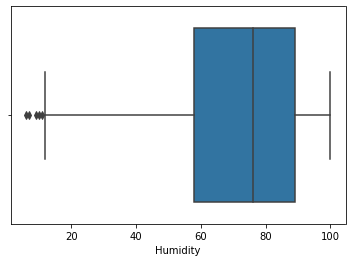

In [9]:
# Couldn't figure out how to use plot_filtered to fix FutureWarning
sns.boxplot(city_info_df["Humidity"])



In [10]:
# Print Outlier (if one exists)
print(np.where(city_info_df["Humidity"] > 100))
# Array is empty, no 'Humidity' over 100% exists in current dataset.

(array([], dtype=int64),)


#### Are There Any Cities With Humidity Over 100 % ?
From the results of the boxplot and the conditional print statement, there does not seem to be any cities within the dataset that has a humidity of over 100%.  

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Temperature vs Latitude Scatter Plot

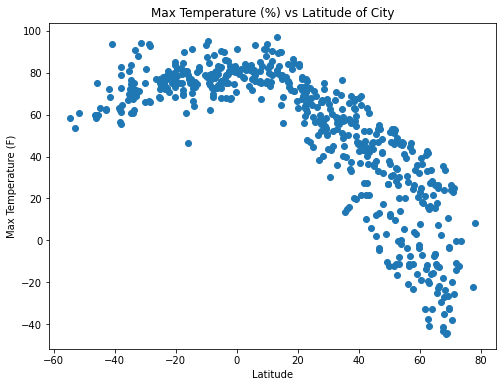

In [11]:
# Latitude vs Temperature
# viz config
plt.figure(figsize=(8,6))
lat_vs_temp = plt.scatter(lat, max_temp, linewidths=1, marker="o")

# titles & labels
plt.title("Max Temperature (%) vs Latitude of City")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
# Display Plot
plt.show()

#### Temperature vs. Latitude Scatter Plot Analysis¶
The above scatter plot analyzies the latitudes of cities (north or south) of the equator against their correponding maximum temperatures (in degrees fahrenheit). Temperatures rise the closer a city is in relation to the equator. Cities south of the equator have higher maximum temperatures in comparison to cities north of the equator.  

In [12]:
# Save fig
lat_vs_temp.get_figure().savefig("../Images/Fig1.png")

## Humidity vs. Latitude Scatter Plot

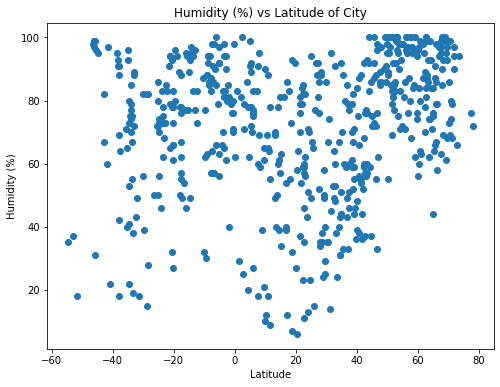

In [13]:
# Latitude vs Humidity
# viz config
plt.figure(figsize=(8,6))
lat_vs_humidity = plt.scatter(lat, humidity, linewidths=1, marker="o")

# titles & labels
plt.title("Humidity (%) vs Latitude of City")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
# Display Plot
plt.show()

#### Humidity vs. Latitude Scatter Plot Analysis

The above scatter plot analyzies percent humidity against the latitudinal of a city in relation to the equator. There seems to be no apparently noticeable relationship between humidity and geolocation. 

In [14]:
lat_vs_humidity.get_figure().savefig("../Images/Fig2.png")

## Cloudiness vs. Latitude Scatter Plot

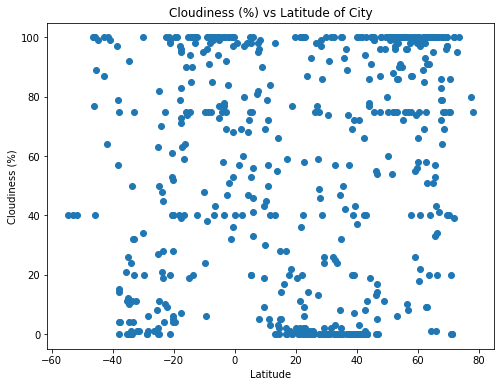

In [15]:
# Cloudiness vs. Latitude Scatter Plot
# viz config
plt.figure(figsize=(8,6))
lat_vs_cloudiness = plt.scatter(lat, cloudiness, linewidths=1, marker="o")

# titles & labels
plt.title("Cloudiness (%) vs Latitude of City")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
# Display Plot
plt.show()

The scatter plot of Cloudiness vs. Latitude does does not show any associations between cloud cover and latitudial location.    

In [16]:
lat_vs_cloudiness.get_figure().savefig("../Images/Fig3.png")

## Wind Speed vs Latitude Scatter Plot

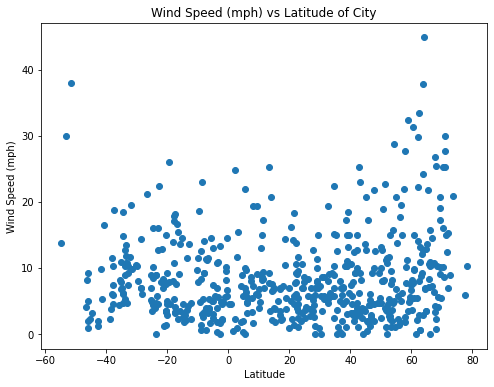

In [17]:
# Wind Speed vs Latitude Scatter Plot
# viz config
plt.figure(figsize=(8,6))
lat_vs_wind_speed = plt.scatter(lat, wind_speed, linewidths=1, marker="o")

# titles & labels
plt.title("Wind Speed (mph) vs Latitude of City")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
# Display Plot
plt.show()

#### Wind Speed vs Latitude Scatter Plot Analysis
The Wind Speed vs Latitude Scatter Plot shows no apparent associations between wind speed and geolocation for cities north or south of the equator.

In [18]:
lat_vs_wind_speed.get_figure().savefig("../Images/Fig4.png")

## Linear Regression

In [19]:
# Linear Regression
def makeLinRegression(city_info_df, x_Col, y_Col):
    # preform linear regression
    (regr_slope, regr_intercept, regr_r_val, _, _) = linregress(city_info_df[x_Col], city_info_df[y_Col])
    # setup x and y axis data for linear regression 
    x = np.array([a for a in range(int(min(city_info_df[x_Col].values)), int(max(city_info_df[x_Col].values)+1))])
    y = regr_slope * x + regr_intercept
    # scatter plot
    axis_df = city_info_df.plot(kind="scatter", x=x_Col, y=y_Col, title="{} vs {} ({})")
    # best fit line
    axis_df.plot(x, y, 'r')
    
    # print statements
    print("Equation for best-fit linear regression line is y={:.2f}x+{:.2f}".format(regr_slope, regr_intercept))
    
    print("r-squared correlation coefficient is {:.2f}".format(regr_r_val))
    
    # return statement
    return axis_df

In [20]:
# Northern and Southern Hemispheres

# Northern Hemisphere DataFrame
northern_hemisphere = city_info_df.loc[city_info_df["Lat"] >= 0]
# Count of Cities in the Northern Hemisphere
northern_count = len(northern_hemisphere)
# Print 
print("The northern hemisphere has {} cities out of {} total, accounting for {:.1%} of cities in the dataset."
      .format(northern_count, city_count, (northern_count/city_count)))

# Southern Hemisphere DataFrame
southern_hemisphere = city_info_df.loc[city_info_df["Lat"] < 0]
# Count of Cities in the Southern Hemisphere
southern_count = len(southern_hemisphere)
# Print 
print("The southern hemisphere has {} cities out of {} total, accounting for {:.1%} of cities in the dataset."
      .format(southern_count, city_count, (southern_count/city_count)))

The northern hemisphere has 383 cities out of 569 total, accounting for 67.3% of cities in the dataset.
The southern hemisphere has 186 cities out of 569 total, accounting for 32.7% of cities in the dataset.


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Line of Best-Fit for linear regression is y=-1.44x+97.68
The r-squared correlation coefficient is -0.85


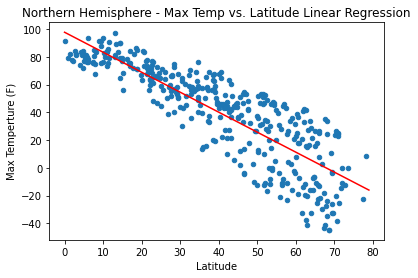

In [21]:
(n_temp_slope, n_temp_intercept, n_temp_r_val, _, _) = linregress(northern_hemisphere["Lat"],
                                                                 northern_hemisphere["Max Temp"])

x = np.array([a for a in range(80)])
y = n_temp_slope * x + n_temp_intercept

n_temp_axes = northern_hemisphere.plot(kind="scatter", x="Lat", y="Max Temp",
                                       title="Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
# line of best fit
n_temp_axes.plot(x, y, 'r')

plt.xlabel("Latitude")
plt.ylabel("Max Temperture (F)")

# print 
print("Line of Best-Fit for linear regression is y={:.2f}x+{:.2f}"
      .format(n_temp_slope, n_temp_intercept))
print("The r-squared correlation coefficient is {:.2f}".format(n_temp_r_val))

# save figure as png
n_temp_axes.get_figure().savefig("../Images/Fig5_N.png")

#### Northern Hemisphere - Max Temp vs. Latitude Linear Regression Analysis

According to the linear regression of maximum temperature vs latitude for the cities in the northern hemisphere, there is a strong negative correlation. The farther away a city's geolocation is to the equator the colder the climate conditions.  

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Equation for best-fit linear regression line is y=0.29x+81.08
r-squared correlation coefficient is 0.46


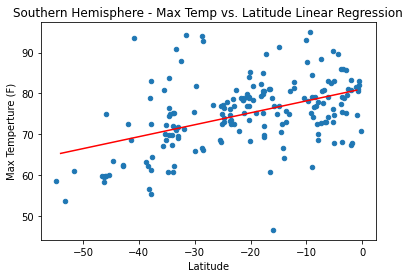

In [22]:
s_temp_axes = makeLinRegression(southern_hemisphere, "Lat", "Max Temp")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temperture (F)")
# save figure as png
s_temp_axes.get_figure().savefig("../Images/Fig6_S.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Equation for best-fit linear regression line is y=0.51x+50.34
r-squared correlation coefficient is 0.44


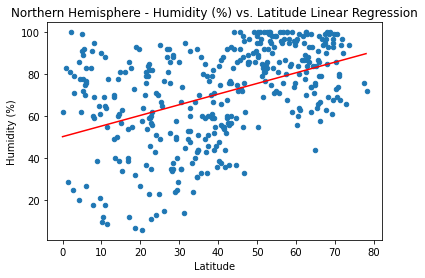

In [23]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
n_humidity_lat_axes = makeLinRegression(northern_hemisphere, "Lat", "Humidity")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
# save figure as png
n_humidity_lat_axes.get_figure().savefig("../Images/Fig7_N.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Equation for best-fit linear regression line is y=0.38x+80.92
r-squared correlation coefficient is 0.25


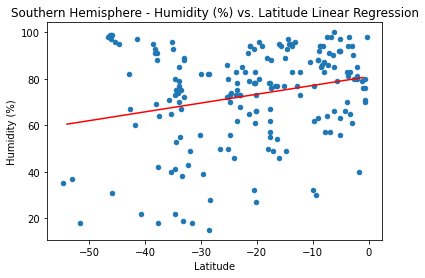

In [24]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
s_humidity_lat_axes = makeLinRegression(southern_hemisphere, "Lat", "Humidity")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
# save figure as png
s_humidity_lat_axes.get_figure().savefig("../Images/Fig8_S.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Equation for best-fit linear regression line is y=0.62x+28.74
r-squared correlation coefficient is 0.31


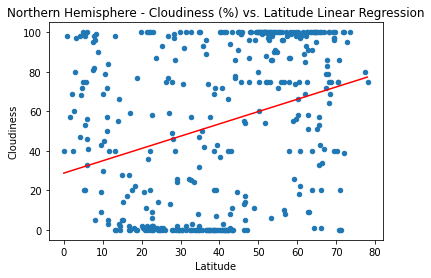

In [25]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
n_cloudiness_lat_axes = makeLinRegression(northern_hemisphere, "Lat", "Cloudiness")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
# save figure as png
n_cloudiness_lat_axes.get_figure().savefig("../Images/Fig9_N.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Equation for best-fit linear regression line is y=1.07x+78.73
r-squared correlation coefficient is 0.38


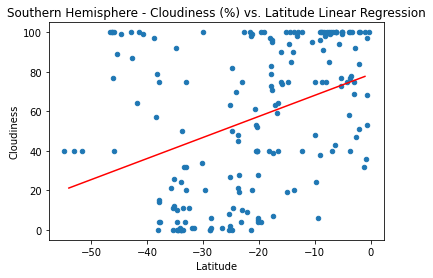

In [26]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
s_cloudiness_lat_axes = makeLinRegression(southern_hemisphere, "Lat", "Cloudiness")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
# save figure as png
s_cloudiness_lat_axes.get_figure().savefig("../Images/Fig10_S.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Equation for best-fit linear regression line is y=0.08x+5.34
r-squared correlation coefficient is 0.23


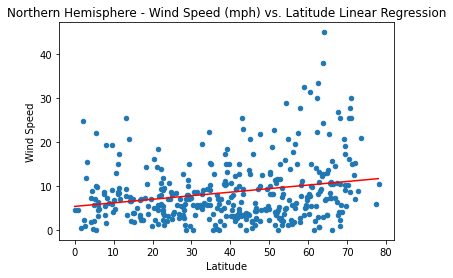

In [27]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
n_wind_lat_axes = makeLinRegression(northern_hemisphere, "Lat", "Wind Speed")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
# save figure as png
n_wind_lat_axes.get_figure().savefig("../Images/Fig11_N.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Equation for best-fit linear regression line is y=-0.08x+6.31
r-squared correlation coefficient is -0.19


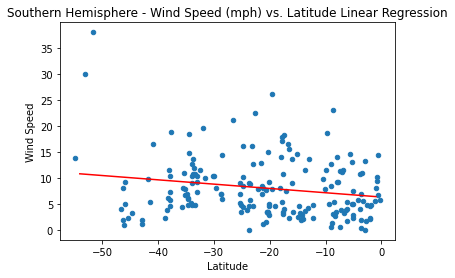

In [28]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
s_wind_lat_axes = makeLinRegression(southern_hemisphere, "Lat", "Wind Speed")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
# save figure as png
s_wind_lat_axes.get_figure().savefig("../Images/Fig12_S.png")